In [1]:
%matplotlib notebook

In [2]:
import os
import sys
from importlib import reload
import numpy as np
from matplotlib import cm, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# path to modules
sys.path.append('/u/phg/adas')
os.getcwd()

import utils.plot as pu
import atomdat.adas.ibal_phg as ibal; reload(ibal)

<module 'atomdat.adas.ibal_phg' from '/u/phg/adas/atomdat/adas/ibal_phg.py'>

In [3]:
te = np.logspace(0.,4.,100)
ne = 1E20

# te, fz, lz, lzl
_,_,lz,_ = ibal.calc_fz('c', te=te, ne=ne, pn='/u/phg/adas/adf11/')
#fig2 = ibal.plot_lz(te,lz,leg=True)

<IPython.core.display.Javascript object>


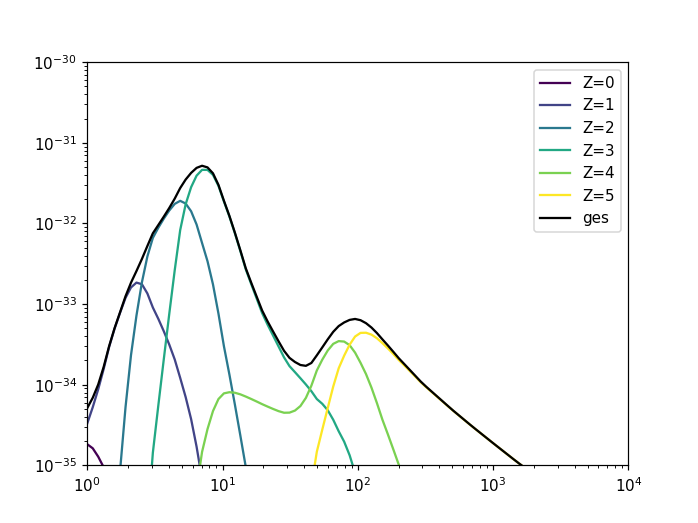

In [4]:
te = np.logspace(0.,4.,100)
ne = 1e20

_,_,lz,_ = ibal.calc_fz('c', te=te, ne=ne, pn='/u/phg/adas/adf11/')
*lz, lges = lz.T


colors = cm.get_cmap("viridis", len(lz))(np.linspace(0.0, 1.0, len(lz)))
plt.close("all")
fig, ax = plt.subplots()

for i, li in enumerate(lz):
    ax.plot(te, li, c=colors[i], label=f"Z={i}")
ax.plot(te, lges, c="k", label="ges")
    
ax.set_yscale("log"); ax.set_xscale("log")
ax.set_xlim(1,10000); ax.set_ylim(1e-35, 1e-30)
ax.legend()

In [28]:
teshape, neshape = (-0, 3.5, 30), (14, 21, 30)
te, ne = np.logspace(*teshape), np.logspace(*neshape)
Te, Ne = np.meshgrid(te, ne)
tle, nle = np.linspace(*teshape), np.linspace(*neshape)
Tle, Nle = np.meshgrid(tle, nle)
Tfe, Nfe = Te.flatten(), Ne.flatten()
_,_,lz,_ = ibal.calc_fz('c', te=Tfe, ne=Nfe)
*lz, lges = lz.reshape((neshape[-1], teshape[-1],lz.shape[-1])).transpose((2,0,1))

<IPython.core.display.Javascript object>


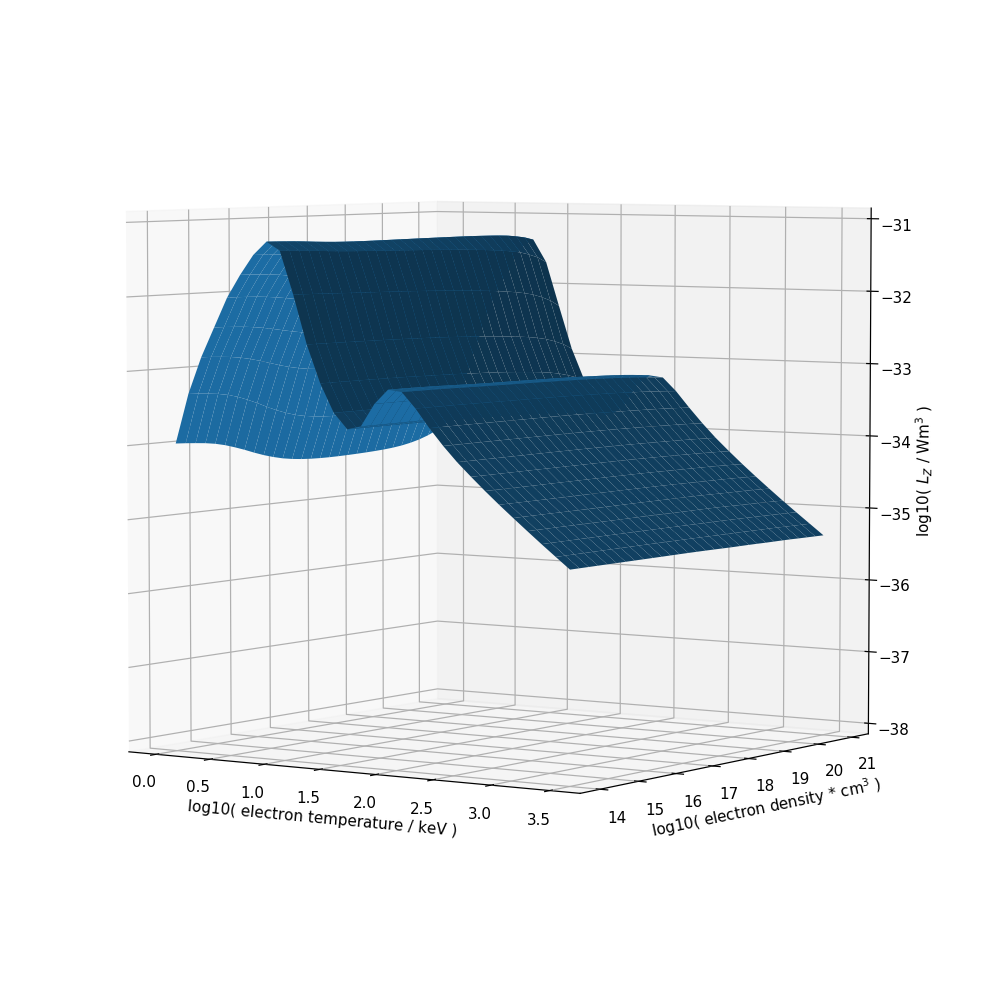

(-38, -31)

In [21]:
# clz = np.log10(lz[-1])
clz = np.log10(lges)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(9,9))
ax.plot_surface(Tle, Nle, clz)
ax.set_xlabel("log10( electron temperature / keV )")
ax.set_ylabel("log10( electron density * cm$^3$ )")
ax.set_zlabel("log10( $L_Z$ / Wm$^3$ )")
fig.tight_layout()
ax.set_zlim((-38,-31))

In [210]:
_,_,lz,_ = ibal.calc_fz('c', te=np.array([1000]), ne=np.array([np.nan]), pn='/u/phg/adas/adf11/')

Requested ne range: nan - nan
Available ne range: 5.00e+13 - 2.00e+21
Requested Te range: 1.00e+03 - 1.00e+03
Available Te range: 2.00e-01 - 1.50e+04
  !! Warning - Out of interpolation domain !!
Requested ne range: nan - nan
Available ne range: 5.00e+13 - 2.00e+21
Requested Te range: 1.00e+03 - 1.00e+03
Available Te range: 2.00e-01 - 1.50e+04
  !! Warning - Out of interpolation domain !!
Requested ne range: nan - nan
Available ne range: 5.00e+13 - 2.00e+21
Requested Te range: 1.00e+03 - 1.00e+03
Available Te range: 2.00e-01 - 1.50e+04
  !! Warning - Out of interpolation domain !!
Requested ne range: nan - nan
Available ne range: 5.00e+13 - 2.00e+21
Requested Te range: 1.00e+03 - 1.00e+03
Available Te range: 2.00e-01 - 1.50e+04
  !! Warning - Out of interpolation domain !!
Requested ne range: nan - nan
Available ne range: 5.00e+13 - 2.00e+21
Requested Te range: 1.00e+03 - 1.00e+03
Available Te range: 2.00e-01 - 1.50e+04
  !! Warning - Out of interpolation domain !!
Requested ne range: 

ValueError: array must not contain infs or NaNs

In [209]:
np.array([np.nan])

array([nan])